[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PennNGG/Quantitative-Neuroscience/blob/master/Concepts/Python/Multiple%20Comparisons.ipynb)

# Definitions

The multiple comparisons problem in statistics occurs when multiple statistical inferences are done simultaneously, which greatly increases the probability that any one inference will yield an erroneous result, by chance. A lot has been written about this problem, including:

- [Its prevalence in fMRI data analysis](https://www.sciencedirect.com/science/article/pii/S1053811912007057?via%3Dihub) (including a compelling illustration by this [prizewinning study](https://blogs.scientificamerican.com/scicurious-brain/ignobel-prize-in-neuroscience-the-dead-salmon-study/)\)

- [How Baysian methods can avoid the problem](http://www.stat.columbia.edu/~gelman/research/published/multiple2f.pdf).

- [General approaches for correcting for multiple comparisons](http://www.biostathandbook.com/multiplecomparisons.html).

Here we will provide some intuition for the problem using a simple thought experiment, to sensitize you to how much of a problem it can be. Consider performing the same statistical test on *N* different samples corresponding to, say, different voxels in fMRI data, using a *p*-value of $\alpha$ (typically 0.05) for each test. 

Thus, for any one test, the probability of getting a Type I error (rejecting $H_0$ when $H_0$ is true) is $\alpha$:

$p_{error}=\alpha$

For two tests, the probably of getting a Type I error for either test is just one minus the combined probability of not getting a Type I error from either one:

$p_{error}=1-(1-\alpha)(1-\alpha)$

For *N* tests, the probably of getting a Type I error for either test is just one minus the combined probability of not getting a Type I error from any one:

$p_{error}=1-(1-\alpha)^N$

Run the cell below to see that the probability of getting a Type I error under these conditions grows rapidly with *N*, implying that it becomes very, very likely that you will get a "statistically significant result" just by chance if you do enough tests:

Text(0, 0.5, '$P_{error}$')

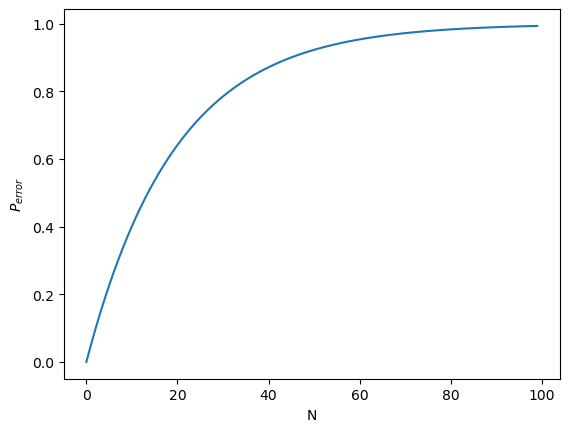

In [1]:
import matplotlib.pyplot as plt
import numpy as np

alpha = 0.05
N = np.arange(0,100)
plt.plot(N, 1-(1-alpha)**N)
plt.xlabel('N')
plt.ylabel('$P_{error}$')

# Correcting for multiple comparisons



There are a number of different methods that can be used to [correct for this problem](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5506159/). Below are two common methods.




## Bonferroni correction

The simplest way to correct for Type I errors (false positives) in multiple comparisons is to divide $\alpha$ by the number of comparisons, known as the [Bonferroni correction](https://mathworld.wolfram.com/BonferroniCorrection.html). This is a very conservative test that is typically used when the number of comparisons is relatively small and you want to avoid Type I errors.

## Benjamini–Hochberg procedure


Another approach is to more carefully control the false-discovery rate using the [Benjamini–Hochberg procedure](https://www.jstor.org/stable/2346101?seq=1#metadata_info_tab_contents):

1\. Rank the individual *p*-values in ascending order, labeled *i*=1...*n*

2\. For each *p*-value, calculate its "critical value" as (*i*/*n*)*Q*, where *i* is the rank, *n* is the total number of tests, and *Q* is the false discovery rate (a percentage) that you choose (typically 0.05).

3\. In your rank-ordered, original *p*-values, find the largest value that is smaller than its associated critical value; this *p*-value is the new criterion (i.e., reject $H_0$ for all cases for which *p* ≤ this value).

# Exercise

In this exercise we will run through an example of correcting for multiple comparisons with both the Benjamini-Hochberg procedure and the more conservative Bonferroni correction. 

First, simulate multiple (say, 1000) t-tests comparing two samples with equal means and standard deviations, and save the p-values. Obviously, at p<0.05 we expect that ~5% of the simulations to yield a "statistically significant" result (of rejecting the NULL hypothesis that the samples come from distributions with equal means).

Second, once you have the simulated p-values, apply both methods to address the multiple comparisons problem.

Third, set the sample 1 and sample 2 means to be 1 and 2 respectively, and re-run the exercise. What do you notice? What if you make the difference between means even greater?

In [8]:
#1
#simulate 1000 t-tests comparing two samples with equal means and standard deviations, and save the p-values
from scipy import stats
np.random.seed(0)
n_tests = 1000
p_values = np.zeros(n_tests)
for i in range(n_tests):
    sample1 = np.random.normal(0, 1, 20)
    sample2 = np.random.normal(0, 1, 20)
    t_stat, p_values[i] = stats.ttest_ind(sample1, sample2)

print(f'Percent of tests with p<0.05: {np.sum(p_values<0.05)/n_tests*100}%')

#2
#apply Bonferroni correction
alpha_bonf = 0.05 / n_tests
n_significant_bonf = np.sum(p_values < alpha_bonf)
print(f'Percent of tests significant after Bonferroni correction: {n_significant_bonf/n_tests*100}%')

#apply Benjamini-Hochberg procedure
Q = 0.05
sorted_p_values = np.sort(p_values)
critical_values = (np.arange(1, n_tests+1) / n_tests) * Q
significant_bh = sorted_p_values <= critical_values
n_significant_bh = np.sum(significant_bh)
print(f'Percent of tests significant after Benjamini-Hochberg procedure: {n_significant_bh/n_tests*100}%')

#3
#set the sample 1 and sample 2 means to be 1 and 2 respectively, and re-run the exercise
p_values_new = np.zeros(n_tests)
for i in range(n_tests):
    sample1 = np.random.normal(1, 1, 20)
    sample2 = np.random.normal(2, 1, 20)
    t_stat, p_values_new[i] = stats.ttest_ind(sample1, sample2)
print(f'Percent of new tests with p<0.05 (new means): {np.sum(p_values_new<0.05)/n_tests*100}%')
alpha_bonf = 0.05 / n_tests
n_significant_bonf = np.sum(p_values_new < alpha_bonf)
print(f'Percent of new tests significant after Bonferroni correction: {n_significant_bonf/n_tests*100}%')
sorted_p_values = np.sort(p_values_new)
critical_values = (np.arange(1, n_tests+1) / n_tests) * Q
significant_bh = sorted_p_values <= critical_values
n_significant_bh = np.sum(significant_bh)
print(f'Percent of new tests significant after Benjamini-Hochberg procedure: {n_significant_bh/n_tests*100}%')

#what if you make the difference between means even greater?
p_values_greater = np.zeros(n_tests)
for i in range(n_tests):
    sample1 = np.random.normal(1, 1, 20)
    sample2 = np.random.normal(3, 1, 20)
    t_stat, p_values_greater[i] = stats.ttest_ind(sample1, sample2)
print(f'Percent of greater difference (means of 1 and 3) tests with p<0.05: {np.sum(p_values_greater<0.05)/n_tests*100}%')
alpha_bonf = 0.05 / n_tests
n_significant_bonf = np.sum(p_values_greater < alpha_bonf)
print(f'Percent of greater difference tests significant after Bonferroni correction: {n_significant_bonf/n_tests*100}%')
sorted_p_values = np.sort(p_values_greater)
critical_values = (np.arange(1, n_tests+1) / n_tests) * Q
significant_bh = sorted_p_values <= critical_values
n_significant_bh = np.sum(significant_bh)
print(f'Percent of greater difference tests significant after Benjamini-Hochberg procedure: {n_significant_bh/n_tests*100}%')


Percent of tests with p<0.05: 4.8%
Percent of tests significant after Bonferroni correction: 0.0%
Percent of tests significant after Benjamini-Hochberg procedure: 0.0%
Percent of new tests with p<0.05 (new means): 87.6%
Percent of new tests significant after Bonferroni correction: 12.7%
Percent of new tests significant after Benjamini-Hochberg procedure: 85.9%
Percent of greater difference (means of 1 and 3) tests with p<0.05: 100.0%
Percent of greater difference tests significant after Bonferroni correction: 94.39999999999999%
Percent of greater difference tests significant after Benjamini-Hochberg procedure: 100.0%


# Additional Resources


How to correct for multiple comparisons in [Matlab](https://www.mathworks.com/help/stats/multcompare.html), [R](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/p.adjust.html), and [Python](https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html)

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania